In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("/kaggle/input/new-process-data-nih/train_meta_data.csv")

In [3]:
df_train_final = df_train.drop(["Image Index","Patient ID"], axis =1)

In [4]:
df_train_final.head()

,Patient Age,Patient Gender,image_path,Diseases,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Encoded
0,4,M,/kaggle/input/data/images_011/images/00026800_...,Mass,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,2,F,/kaggle/input/data/images_004/images/00007945_...,Cardiomegaly,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,3,M,/kaggle/input/data/images_008/images/00017078_...,Nodule,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,4,M,/kaggle/input/data/images_011/images/00026135_...,Effusion,0,0,0,0,1,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,3,M,/kaggle/input/data/images_008/images/00017751_...,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [5]:
df_disease_age_gender = df_train_final[["Patient Age","Patient Gender","Diseases"]]

In [6]:
df_disease_age_gender.head()

,Patient Age,Patient Gender,Diseases
0,4,M,Mass
1,2,F,Cardiomegaly
2,3,M,Nodule
3,4,M,Effusion
4,3,M,No Finding


In [8]:
df_diseases_vs_age =df_disease_age_gender.groupby("Diseases")["Patient Age"].value_counts()

In [10]:
df_diseases_vs_age

Diseases            Patient Age
Atelectasis         3              1917
                    4               597
                    2               470
                    1               245
Cardiomegaly        3               792
                    2               353
                    4               249
                    1               168
Consolidation       3              1351
                    2               544
                    4               404
                    1               326
Edema               3               725
                    2               287
                    1               153
                    4               130
Effusion            3              2116
                    4               702
                    2               646
                    1               319
Emphysema           3               752
                    4               286
                    2               200
                    1               177
Fibrosis

In [14]:
import pandas as pd

# If your data came from groupby().size()
df_plot = (
    df_diseases_vs_age
    .reset_index(name="Count")
    .rename(columns={"Diseases": "Disease", "Patient Age": "Age"})
)

df_plot["Age"] = df_plot["Age"].astype(str)

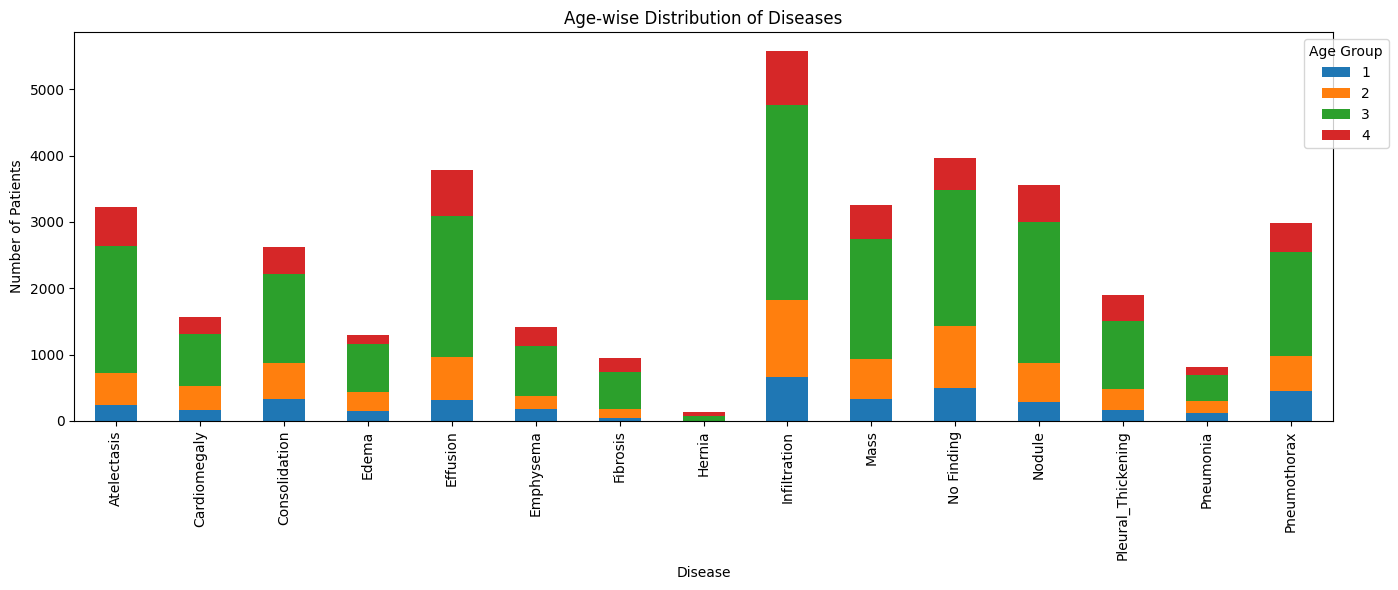

In [15]:
import matplotlib.pyplot as plt

pivot = df_plot.pivot(
    index="Disease",
    columns="Age",
    values="Count"
).fillna(0)

pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6)
)

plt.ylabel("Number of Patients")
plt.xlabel("Disease")
plt.title("Age-wise Distribution of Diseases")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

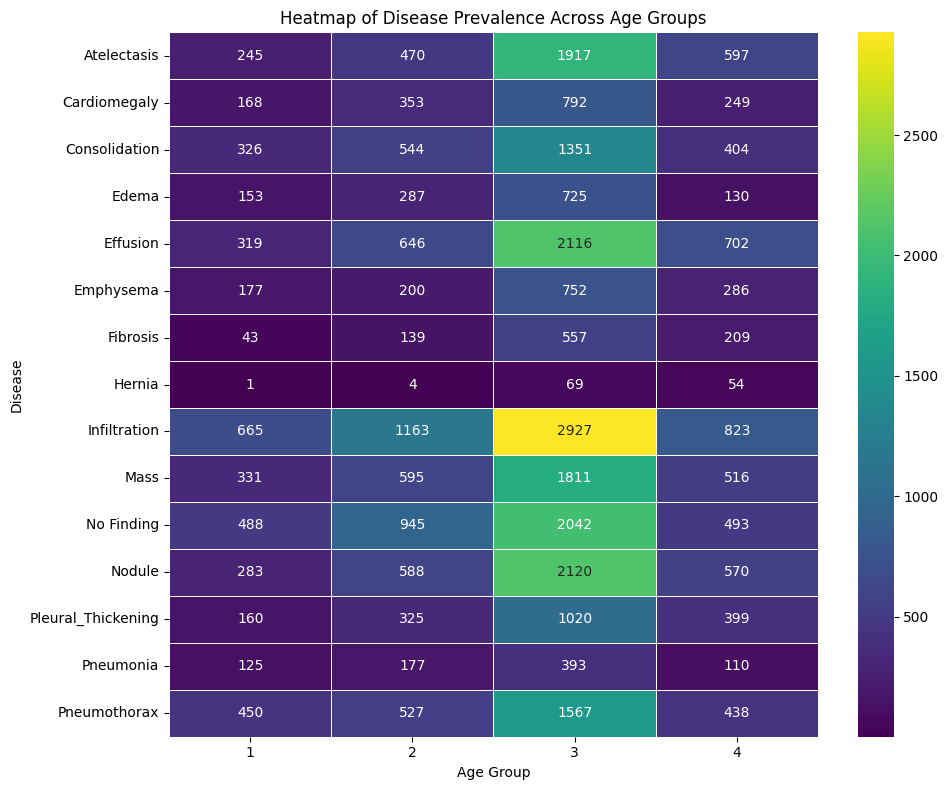

In [16]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))

sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="viridis",
    linewidths=0.5
)

plt.title("Heatmap of Disease Prevalence Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


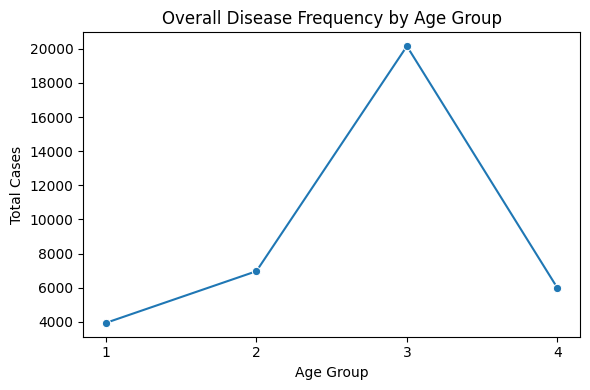

In [17]:
age_totals = (
    df_plot
    .groupby("Age")["Count"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(6, 4))
sns.lineplot(
    data=age_totals,
    x="Age",
    y="Count",
    marker="o"
)

plt.title("Overall Disease Frequency by Age Group")
plt.ylabel("Total Cases")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

In [18]:
df_diseases_vs_gender =df_disease_age_gender.groupby("Diseases")["Patient Gender"].value_counts()

In [19]:
df_diseases_vs_gender.head()

Diseases       Patient Gender
Atelectasis    M                 1915
               F                 1314
Cardiomegaly   F                  825
               M                  737
Consolidation  M                 1473
Name: count, dtype: int64

In [21]:
import pandas as pd

# If your data came from groupby().size()
df_plot = (
    df_diseases_vs_gender
    .reset_index(name="Count")
    .rename(columns={"Diseases": "Disease", "Patient Gender": "Gender"})
)

df_plot["Gender"] = df_plot["Gender"].astype(str)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


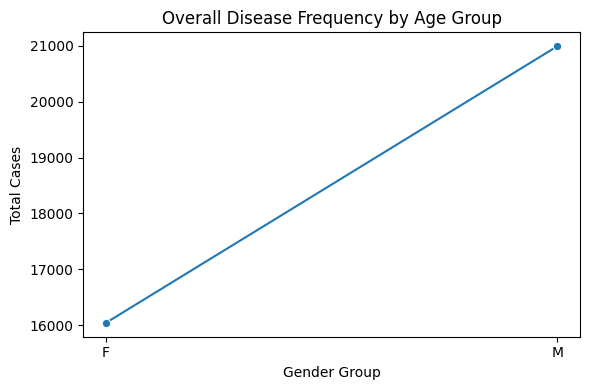

In [22]:
gender_totals = (
    df_plot
    .groupby("Gender")["Count"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(6, 4))
sns.lineplot(
    data=gender_totals,
    x="Gender",
    y="Count",
    marker="o"
)

plt.title("Overall Disease Frequency by Age Group")
plt.ylabel("Total Cases")
plt.xlabel("Gender Group")
plt.tight_layout()
plt.show()

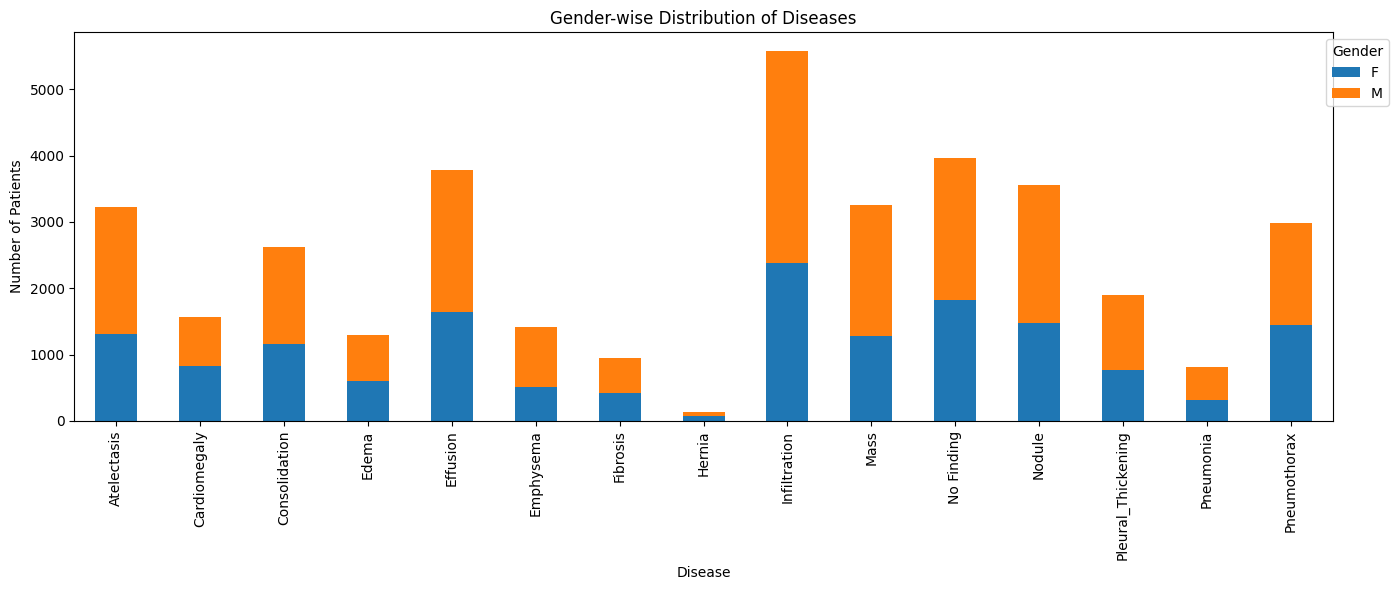

In [24]:
import matplotlib.pyplot as plt

pivot = df_plot.pivot(
    index="Disease",
    columns="Gender",
    values="Count"
).fillna(0)

pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6)
)

plt.ylabel("Number of Patients")
plt.xlabel("Disease")
plt.title("Gender-wise Distribution of Diseases")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

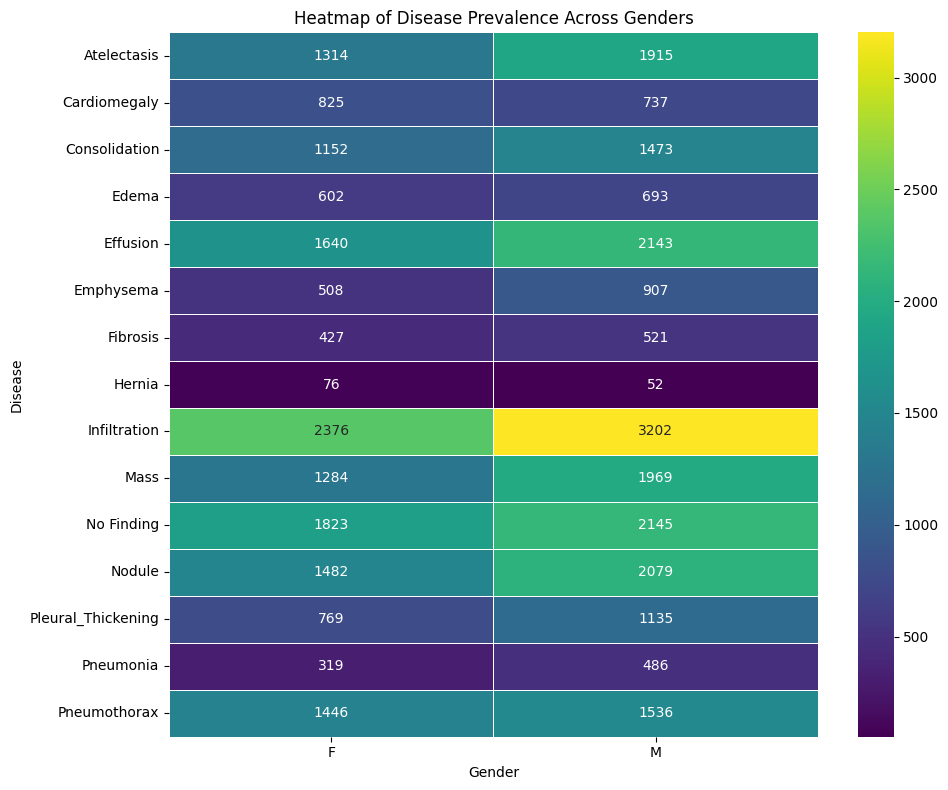

In [25]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))

sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="viridis",
    linewidths=0.5
)

plt.title("Heatmap of Disease Prevalence Across Genders")
plt.xlabel("Gender")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

In [26]:
df_train_final.head()

,Patient Age,Patient Gender,image_path,Diseases,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Encoded
0,4,M,/kaggle/input/data/images_011/images/00026800_...,Mass,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,2,F,/kaggle/input/data/images_004/images/00007945_...,Cardiomegaly,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,3,M,/kaggle/input/data/images_008/images/00017078_...,Nodule,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,4,M,/kaggle/input/data/images_011/images/00026135_...,Effusion,0,0,0,0,1,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,3,M,/kaggle/input/data/images_008/images/00017751_...,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [28]:
df = pd.DataFrame(
    df_train_final.pivot_table(values='image_path', index='Patient Gender', columns='Patient Age', aggfunc="count"),
    index=["F", "M"]
)

df.index.name = "Gender"
df.columns.name = "Age Group"

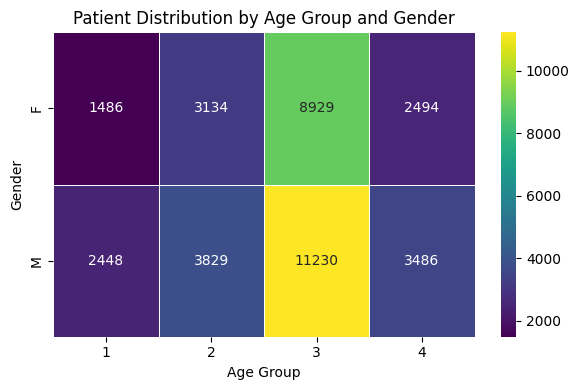

In [29]:
plt.figure(figsize=(6, 4))

sns.heatmap(
    df,
    annot=True,
    fmt="d",
    cmap="viridis",
    linewidths=0.5
)

plt.title("Patient Distribution by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

# Make sure columns are correct
df_plot = df_train_final.copy()

In [32]:
df_plot.head()

,Patient Age,Patient Gender,image_path,Diseases,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Encoded
0,4,M,/kaggle/input/data/images_011/images/00026800_...,Mass,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,2,F,/kaggle/input/data/images_004/images/00007945_...,Cardiomegaly,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,3,M,/kaggle/input/data/images_008/images/00017078_...,Nodule,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,4,M,/kaggle/input/data/images_011/images/00026135_...,Effusion,0,0,0,0,1,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,3,M,/kaggle/input/data/images_008/images/00017751_...,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [33]:


# Keep only disease rows (drop No Finding if present)
df_plot = df_plot[df_plot["Diseases"] != "No Finding"]

# Ensure correct dtypes
df_plot["Patient Age"] = df_plot["Patient Age"].astype(str)
df_plot["Patient Gender"] = df_plot["Patient Gender"].astype(str)

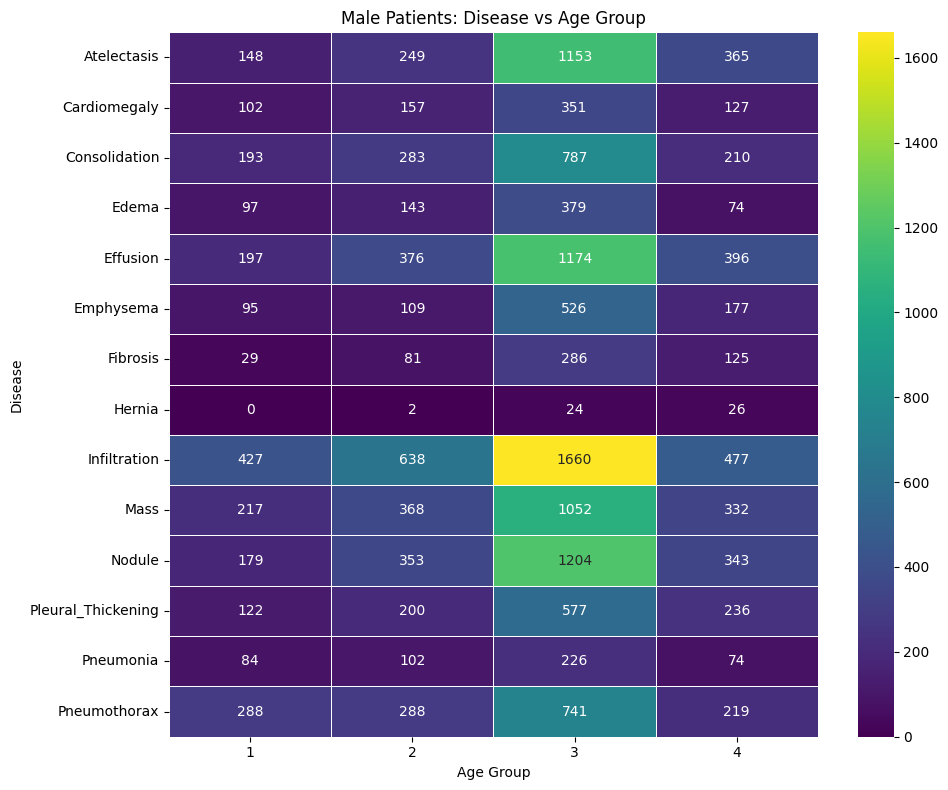

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

male_df = df_plot[df_plot["Patient Gender"] == "M"]

pivot_m = (
    male_df
    .groupby(["Diseases", "Patient Age"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_m,
    annot=True,
    fmt="d",
    cmap="viridis",
    linewidths=0.5
)

plt.title("Male Patients: Disease vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

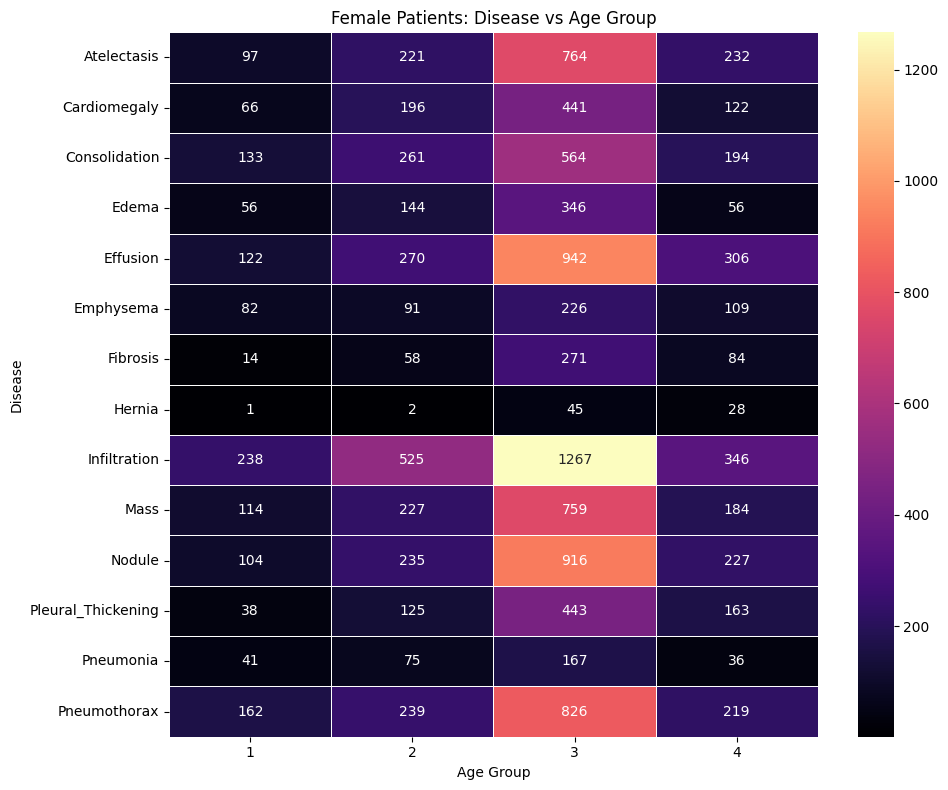

In [35]:
female_df = df_plot[df_plot["Patient Gender"] == "F"]

pivot_f = (
    female_df
    .groupby(["Diseases", "Patient Age"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_f,
    annot=True,
    fmt="d",
    cmap="magma",
    linewidths=0.5
)

plt.title("Female Patients: Disease vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

In [36]:
df_bbox = pd.read_csv("/kaggle/input/new-process-data-nih/Bbox_metadata.csv")

In [37]:
df_bbox.head()

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h],Patient Age,Patient Gender,image_path
0,0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,4,M,/kaggle/input/data/images_006/images/00013118_...
1,1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,3,M,/kaggle/input/data/images_007/images/00014716_...
2,2,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,3,M,/kaggle/input/data/images_007/images/00014687_...
3,3,00022098_006.png,Atelectasis,494.101695,577.392098,271.186441,154.033898,3,F,/kaggle/input/data/images_010/images/00022098_...
4,4,00014198_000.png,Atelectasis,676.338983,512.307352,98.711864,193.084746,1,F,/kaggle/input/data/images_007/images/00014198_...


In [43]:
df_bbox = df_bbox.rename(columns={
    "Bbox [x": "x",
    "h]": "h"
})

In [44]:
def visualize_bbox_row(row, color=(255, 0, 0)):
    """
    Visualize image with bounding box and metadata
    """

    # ---- Load image ----
    img = cv2.imread(row["image_path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ---- Bounding box ----
    x, y, w, h = int(row["x"]), int(row["y"]), int(row["w"]), int(row["h"])

    # Draw rectangle
    cv2.rectangle(
        img,
        (x, y),
        (x + w, y + h),
        color,
        thickness=2
    )

    # ---- Label text ----
    label_text = (
        f"{row['Finding Label']} | "
        f"Age: {row['Patient Age']} | "
        f"Gender: {row['Patient Gender']}"
    )

    # Put text above bbox
    cv2.putText(
        img,
        label_text,
        (x, max(20, y - 10)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        color,
        2,
        cv2.LINE_AA
    )

    # ---- Show ----
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

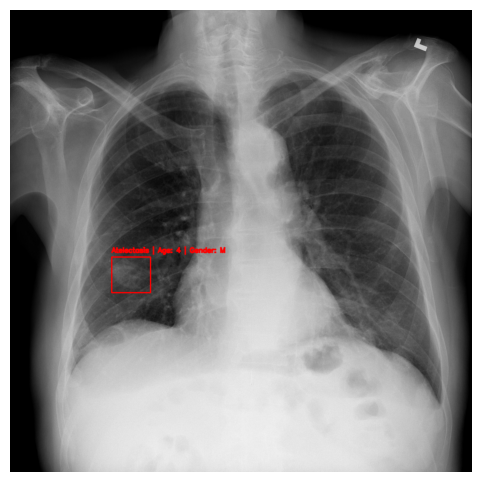

In [45]:
import cv2

visualize_bbox_row(df_bbox.iloc[0])

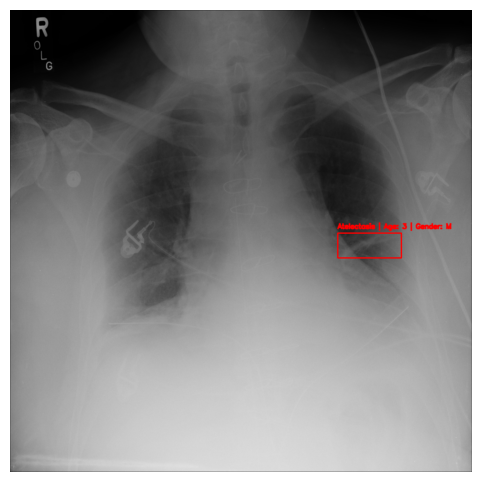

In [46]:

visualize_bbox_row(df_bbox.iloc[2])

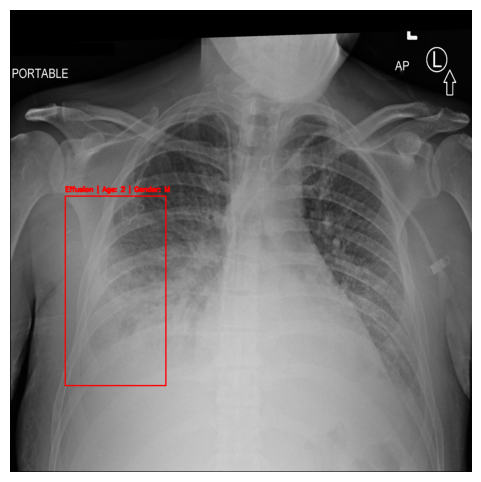

In [49]:

visualize_bbox_row(df_bbox.iloc[400])

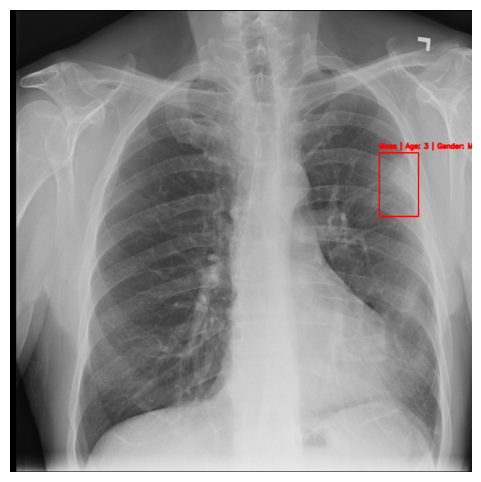

In [50]:
visualize_bbox_row(df_bbox.iloc[520])

In [51]:
df_reports = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")

In [53]:
df_proj = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")

In [54]:
df_proj.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [55]:
df_proj = df_proj[df_proj["projection"] == "Frontal"]

In [56]:
df_proj.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
2,2,2_IM-0652-1001.dcm.png,Frontal
4,3,3_IM-1384-1001.dcm.png,Frontal
6,4,4_IM-2050-1001.dcm.png,Frontal
8,5,5_IM-2117-1003002.dcm.png,Frontal


In [57]:
df_proj_req = df_proj[["uid","filename"]]

In [52]:
df_reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [59]:
df_reports_req = df_reports[["uid","Problems","impression"]]

In [63]:
df_rep_proj_final = pd.merge(df_reports_req, df_proj_req, how="inner", on="uid")

In [64]:
df_rep_proj_final.head()

,uid,Problems,impression,filename
0,1,normal,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png
1,2,Cardiomegaly;Pulmonary Artery,No acute pulmonary findings.,2_IM-0652-1001.dcm.png
2,3,normal,"No displaced rib fractures, pneumothorax, or p...",3_IM-1384-1001.dcm.png
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...",1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png
4,5,Osteophyte;Thickening;Lung,No acute cardiopulmonary abnormality.,5_IM-2117-1003002.dcm.png


In [65]:
prefix="/kaggle/input/chest-xrays-indiana-university/images/images_normalized/"

In [66]:
df_rep_proj_final["image_path"] = prefix + df_rep_proj_final["filename"]

In [67]:
df_rep_proj_final.head()

,uid,Problems,impression,filename,image_path
0,1,normal,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,/kaggle/input/chest-xrays-indiana-university/i...
1,2,Cardiomegaly;Pulmonary Artery,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,/kaggle/input/chest-xrays-indiana-university/i...
2,3,normal,"No displaced rib fractures, pneumothorax, or p...",3_IM-1384-1001.dcm.png,/kaggle/input/chest-xrays-indiana-university/i...
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...",1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png,/kaggle/input/chest-xrays-indiana-university/i...
4,5,Osteophyte;Thickening;Lung,No acute cardiopulmonary abnormality.,5_IM-2117-1003002.dcm.png,/kaggle/input/chest-xrays-indiana-university/i...


In [69]:
df_rep_proj_final.drop("uid", axis=1, inplace=True)

In [71]:
df_rep_proj_final.drop("filename", axis=1, inplace=True)

In [72]:
df_rep_proj_final.head()

,Problems,impression,image_path
0,normal,Normal chest x-XXXX.,/kaggle/input/chest-xrays-indiana-university/i...
1,Cardiomegaly;Pulmonary Artery,No acute pulmonary findings.,/kaggle/input/chest-xrays-indiana-university/i...
2,normal,"No displaced rib fractures, pneumothorax, or p...",/kaggle/input/chest-xrays-indiana-university/i...
3,"Pulmonary Disease, Chronic Obstructive;Bullous...",1. Bullous emphysema and interstitial fibrosis...,/kaggle/input/chest-xrays-indiana-university/i...
4,Osteophyte;Thickening;Lung,No acute cardiopulmonary abnormality.,/kaggle/input/chest-xrays-indiana-university/i...


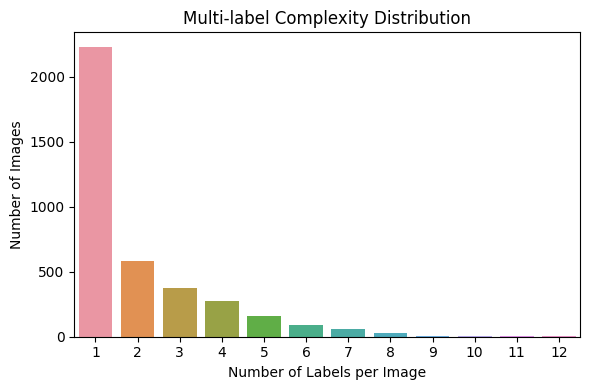

In [79]:
df_rep_proj_final["num_labels"] = df_rep_proj_final["Problems"].apply(
    lambda x: len(str(x).split(";"))
)

plt.figure(figsize=(6, 4))
sns.countplot(x=df_rep_proj_final["num_labels"])
plt.xlabel("Number of Labels per Image")
plt.ylabel("Number of Images")
plt.title("Multi-label Complexity Distribution")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


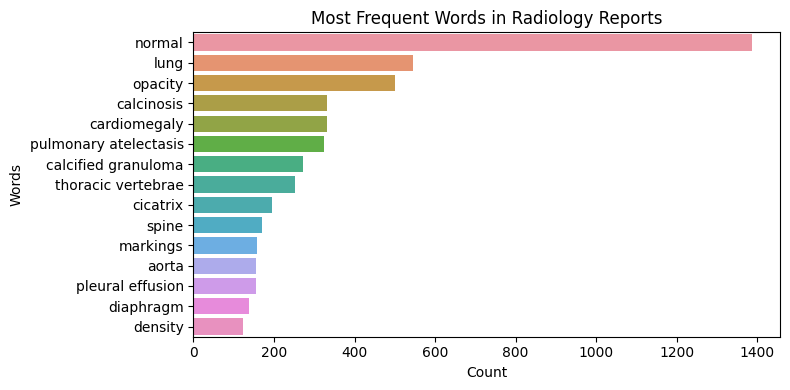

In [87]:
from collections import Counter

all_labels = []

for lbl in df_rep_proj_final["Problems"]:
    all_labels.extend([x.strip().lower() for x in str(lbl).split(";")])

label_counts = Counter(all_labels)

top_labels = label_counts.most_common(15)

labels, counts = zip(*top_labels)

plt.figure(figsize=(8, 4))
sns.barplot(x=list(counts), y=list(labels))
plt.title("Most Frequent Words in Radiology Reports")
plt.xlabel("Count")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


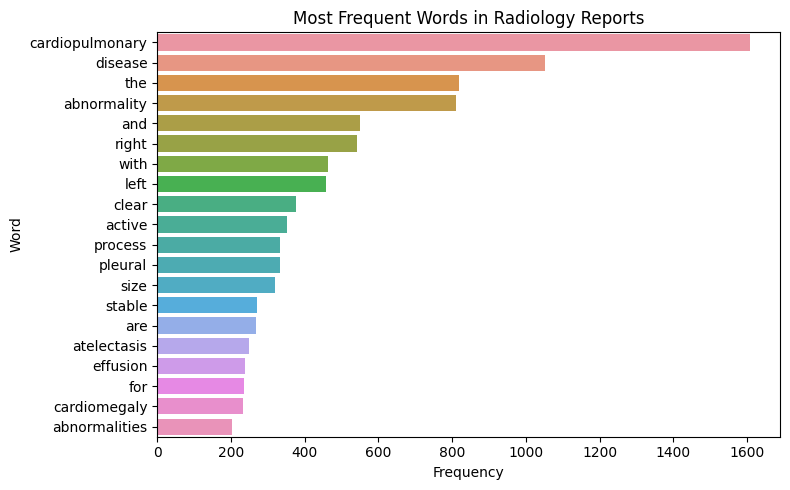

In [85]:
import re
from collections import Counter

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df_rep_proj_final["clean_report"] = df_rep_proj_final["impression"].apply(clean_text)
medical_stopwords = set([
    "no", "not", "normal", "acute", "chest", "lungs", "lung",
    "heart", "cardiac", "pulmonary", "study", "finding",
    "findings", "evidence", "seen", "without", "xxxx"
])

words = []

for report in df_rep_proj_final["clean_report"]:
    words.extend([
        w for w in report.split()
        if w not in medical_stopwords and len(w) > 2
    ])

word_counts = Counter(words)
top_words = word_counts.most_common(20)

words_, counts_ = zip(*top_words)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts_), y=list(words_))
plt.title("Most Frequent Words in Radiology Reports")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

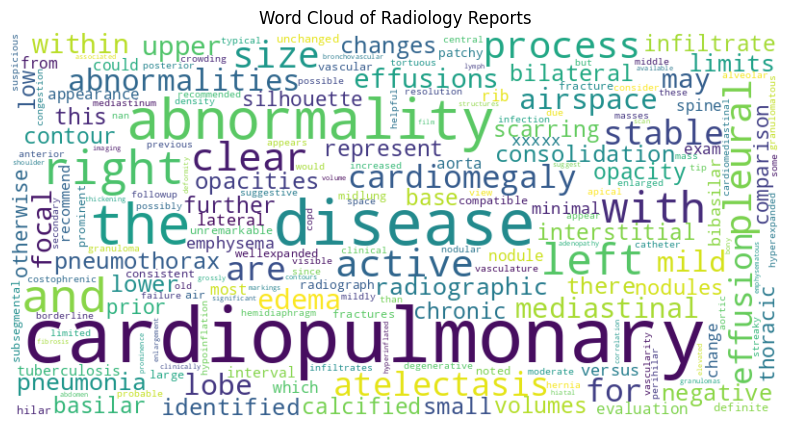

In [86]:
from wordcloud import WordCloud

wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Radiology Reports")
plt.show()

In [88]:
normal_words = Counter()
abnormal_words = Counter()

for _, row in df_rep_proj_final.iterrows():
    words = row["clean_report"].split()
    words = [w for w in words if w not in medical_stopwords and len(w) > 2]

    if "normal" in str(row["Problems"]).lower():
        normal_words.update(words)
    else:
        abnormal_words.update(words)

print("Normal top words:", normal_words.most_common(10))
print("Abnormal top words:", abnormal_words.most_common(10))

Normal top words: [('cardiopulmonary', 797), ('abnormality', 378), ('disease', 356), ('active', 148), ('clear', 146), ('process', 135), ('and', 109), ('size', 100), ('abnormalities', 91), ('are', 80)]
Abnormal top words: [('cardiopulmonary', 812), ('the', 745), ('disease', 696), ('right', 530), ('with', 453), ('left', 447), ('and', 442), ('abnormality', 433), ('pleural', 279), ('atelectasis', 250)]
